In [13]:
from google.colab import files
uploaded = files.upload()

Saving Stock_Price_data_set.xlsx to Stock_Price_data_set (1).xlsx


In [14]:
import pandas as pd

df = pd.read_excel('Stock_Price_data_set.xlsx')

df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-02-05,262.000000,267.899994,250.029999,254.259995,254.259995,11896100.0
1,2018-02-06,247.699997,266.700012,245.000000,265.720001,265.720001,12595800.0
2,2018-02-07,266.579987,272.450012,264.329987,264.559998,264.559998,8981500.0
3,2018-02-08,267.079987,267.619995,250.000000,250.100006,250.100006,9306700.0
4,2018-02-09,253.850006,255.800003,236.110001,249.470001,249.470001,16906900.0


In [15]:
df.shape

(1009, 7)

In [16]:
df.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1009 entries, 0 to 1008
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       1009 non-null   datetime64[ns]
 1   Open       1009 non-null   float64       
 2   High       1009 non-null   float64       
 3   Low        1009 non-null   float64       
 4   Close      1009 non-null   float64       
 5   Adj Close  1009 non-null   float64       
 6   Volume     1009 non-null   float64       
dtypes: datetime64[ns](1), float64(6)
memory usage: 55.3 KB


In [18]:
print(df.Date.max())
print(df.Date.min())

2022-02-04 00:00:00
2018-02-05 00:00:00


In [19]:
df.drop('Adj Close',axis =1,inplace = True)

In [20]:
df.head()

,Date,Open,High,Low,Close,Volume
0,2018-02-05,262.000000,267.899994,250.029999,254.259995,11896100.0
1,2018-02-06,247.699997,266.700012,245.000000,265.720001,12595800.0
2,2018-02-07,266.579987,272.450012,264.329987,264.559998,8981500.0
3,2018-02-08,267.079987,267.619995,250.000000,250.100006,9306700.0
4,2018-02-09,253.850006,255.800003,236.110001,249.470001,16906900.0


In [21]:
df['Date'] = df['Date'].astype(str)

In [22]:
df.describe()

,Open,High,Low,Close,Volume
count,1009.000000,1009.000000,1009.000000,1009.000000,1.009000e+03
mean,419.059673,425.320703,412.374044,419.000733,7.570685e+06
std,108.537532,109.262960,107.555867,108.289999,5.465535e+06
min,233.919998,250.649994,231.229996,233.880005,1.144000e+06
25%,331.489990,336.299988,326.000000,331.619995,4.091900e+06
50%,377.769989,383.010010,370.880005,378.670013,5.934500e+06
75%,509.130005,515.630005,502.529999,509.079987,9.322400e+06
max,692.349976,700.989990,686.090027,691.690002,5.890430e+07


In [23]:
df.isna().any() #checking NAN Values

Date      False
Open      False
High      False
Low       False
Close     False
Volume    False
dtype: bool

In [24]:
df.duplicated().sum() #checking DUPLICATE values

0

In [25]:
gstock_data = df[['Date','Open','Close']]
gstock_data ['Date'] = pd.to_datetime(gstock_data ['Date'].apply(lambda x: x.split()[0])) 
gstock_data .set_index('Date',drop=True,inplace=True) 
gstock_data .head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Open,Close
Date,,
2018-02-05,262.000000,254.259995
2018-02-06,247.699997,265.720001
2018-02-07,266.579987,264.559998
2018-02-08,267.079987,250.100006
2018-02-09,253.850006,249.470001


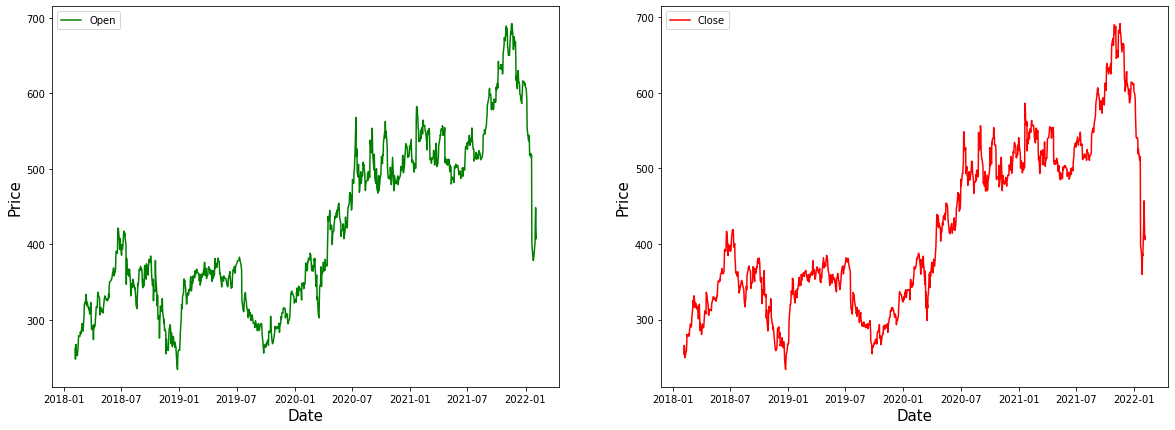

In [28]:
import matplotlib.pyplot as plt

fg, ax =plt.subplots(1,2,figsize=(20,7))
ax[0].plot(gstock_data ['Open'],label='Open',color='green')
ax[0].set_xlabel('Date',size=15)
ax[0].set_ylabel('Price',size=15)
ax[0].legend()
ax[1].plot(gstock_data ['Close'],label='Close',color='red')
ax[1].set_xlabel('Date',size=15)
ax[1].set_ylabel('Price',size=15)
ax[1].legend()
fg.show()

In [29]:
from sklearn.preprocessing import MinMaxScaler
Ms = MinMaxScaler()
gstock_data [gstock_data .columns] = Ms.fit_transform(gstock_data )

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:3678: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[col] = igetitem(value, i)


In [30]:
training_size = round(len(gstock_data ) * 0.80)

In [31]:
train_data = gstock_data [:training_size]
test_data  = gstock_data [training_size:]

In [32]:
import numpy as np

def create_sequence(dataset):
  sequences = []
  labels = []

  start_idx = 0

  for stop_idx in range(50,len(dataset)): 
    sequences.append(dataset.iloc[start_idx:stop_idx])
    labels.append(dataset.iloc[stop_idx])
    start_idx += 1
  return (np.array(sequences),np.array(labels))

In [33]:
train_seq, train_label = create_sequence(train_data)
test_seq, test_label = create_sequence(test_data)

In [34]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM, Bidirectional

In [36]:
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape = (train_seq.shape[1], train_seq.shape[2])))

model.add(Dropout(0.1)) 
model.add(LSTM(units=50))

model.add(Dense(2))

model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mean_absolute_error'])


In [37]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (None, 50, 50)            10600     
                                                                 
 dropout_1 (Dropout)         (None, 50, 50)            0         
                                                                 
 lstm_3 (LSTM)               (None, 50)                20200     
                                                                 
 dense_1 (Dense)             (None, 2)                 102       
                                                                 
Total params: 30,902
Trainable params: 30,902
Non-trainable params: 0
_________________________________________________________________


In [38]:
model.fit(train_seq, train_label, epochs=80,validation_data=(test_seq, test_label), verbose=1)

Epoch 1/80
24/24 [==============================] - 6s 86ms/step - loss: 0.0289 - mean_absolute_error: 0.1201 - val_loss: 0.0298 - val_mean_absolute_error: 0.1563
Epoch 2/80
24/24 [==============================] - 1s 47ms/step - loss: 0.0036 - mean_absolute_error: 0.0474 - val_loss: 0.0088 - val_mean_absolute_error: 0.0697
Epoch 3/80
24/24 [==============================] - 1s 47ms/step - loss: 0.0025 - mean_absolute_error: 0.0375 - val_loss: 0.0078 - val_mean_absolute_error: 0.0607
Epoch 4/80
24/24 [==============================] - 1s 47ms/step - loss: 0.0023 - mean_absolute_error: 0.0363 - val_loss: 0.0074 - val_mean_absolute_error: 0.0600
Epoch 5/80
24/24 [==============================] - 1s 47ms/step - loss: 0.0021 - mean_absolute_error: 0.0345 - val_loss: 0.0070 - val_mean_absolute_error: 0.0569
Epoch 6/80
24/24 [==============================] - 1s 46ms/step - loss: 0.0022 - mean_absolute_error: 0.0354 - val_loss: 0.0067 - val_mean_absolute_error: 0.0552
Epoch 7/80
24/24 [====

In [39]:
test_predicted = model.predict(test_seq)

5/5 [==============================] - 1s 22ms/step


In [41]:
test_inverse_predicted = Ms.inverse_transform(test_predicted)

In [49]:
# Merging actual and predicted data for better visualization
gs_slic_data = pd.concat([gstock_data .iloc[-152:].copy(),pd.DataFrame(test_inverse_predicted,columns=['open_predicted','close_predicted'],index=gstock_data .iloc[-152:].index)], axis=1)

In [50]:
gs_slic_data[['Open','Close']] = Ms.inverse_transform(gs_slic_data[['Open','Close']])

In [51]:
gs_slic_data.head()

,Open,Close,open_predicted,close_predicted
Date,,,,
2021-07-01,525.719971,533.539978,517.857239,521.272949
2021-07-02,535.500000,533.979980,517.081848,520.380066
2021-07-06,533.000000,541.640015,521.375183,524.139648
2021-07-07,544.239990,535.960022,526.242126,528.871582
2021-07-08,530.929993,530.760010,527.511597,530.600281


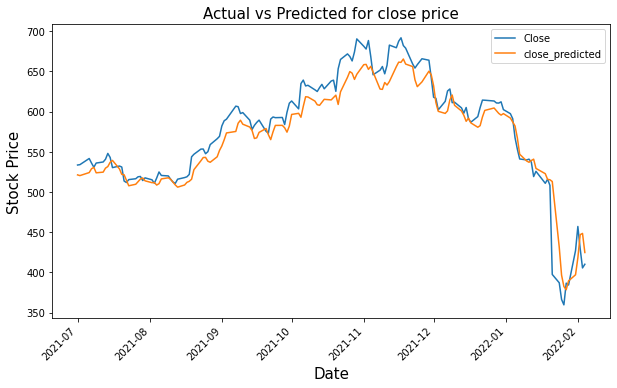

In [54]:
gs_slic_data[['Close','close_predicted']].plot(figsize=(10,6))
plt.xticks(rotation=45)
plt.xlabel('Date',size=15)
plt.ylabel('Stock Price',size=15)
plt.title('Actual vs Predicted for close price',size=15)
plt.show()